<a href="https://colab.research.google.com/github/SamuelMiller413/N1-Health/blob/main/N1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Set Up

#### Imports

In [1]:
import numpy as np 
import pandas as pd 

                                                                          # PRE-PROCESSING
from sklearn.preprocessing import StandardScaler
                                                                          # FEATURE SELECTION
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, RFE, RFECV

                                                                          # PIPELINE
from sklearn.pipeline import Pipeline
                                                                          # REGRESSORS       
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
                                          
                                                                          # NEURAL NETWORK
from sklearn.neural_network import MLPRegressor

                                                                          # CROSS VALIDATION
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, cross_val_predict
from sklearn.model_selection import KFold, RandomizedSearchCV

                                                                          # EVALUATION
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import SCORERS

                                                                          # PLOTTING
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

                                                                          # DATA SET



#### Drive Mount

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Data Load

##### FDA

The Food Atlas data span multiple CSV's:
* primary dataset
* variable list
* 2 supplemental datasets 
    * county
    * state
<br/>  

I'll be supplementing the primary
dataset with the county dataset and using the variable list for reference while merging and parsing the dataframes.

In [3]:
# # path to excel
# atlas = '/content/drive/MyDrive/N1 Health/N1 Health/Datasets/Food Atlas/FoodEnvironmentAtlas.xls'

# # read to df
# df_atlas = pd.read_excel(atlas)

In [4]:
# path to primary csv
fda = '/content/drive/MyDrive/N1 Health/N1 Health/Datasets//USDA ERS/StateAndCountyData.csv'

# path to variable list
fda_vars = '/content/drive/MyDrive/N1 Health/N1 Health/Datasets/USDA ERS/VariableList.csv'

# supplemental FDA paths
# fda_county = '/content/drive/MyDrive/N1 Health/N1 Health/Datasets/USDA ERS/SupplementalDataCounty.csv'
# fda_state = '/content/drive/MyDrive/N1 Health/N1 Health/Datasets/USDA ERS/SupplementalDataState.csv'

# read to df
df_fda_raw = pd.read_csv(fda) # Needs processing
df_fda_vars = pd.read_csv(fda_vars)
# df_fda_county = pd.read_csv(fda_county)
# df_fda_state = pd.read_csv(fda_state)

##### CDC

In [5]:
## path
# cdc = '/content/drive/MyDrive/N1 Health/N1 Health/Datasets/CDC/500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.csv'

## read to df
# df_cdc = pd.read_csv(cdc)

##### CMS

In [6]:
# path
# cms = '/content/drive/MyDrive/N1 Health/N1 Health/Datasets/CMS/Geographic Variation Public Use File State County.csv'

# read to df
# df_cms = pd.read_csv(cms)

### Wrangling / Initial EDA

#### df_fda_vars

In [7]:
df_fda_vars

,Variable_Name,Category_Name,Category_Code,Subcategory_Name,Variable_Code,Geography,Units
0,"Population, low access to store, 2010",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP10,CNTY10,Count
1,"Population, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP15,CNTY10,Count
2,"Population, low access to store (% change), 20...",Access and Proximity to Grocery Store,ACCESS,Overall,PCH_LACCESS_POP_10_15,CNTY10,% change
3,"Population, low access to store (%), 2010",Access and Proximity to Grocery Store,ACCESS,Overall,PCT_LACCESS_POP10,CNTY10,Percent
4,"Population, low access to store (%), 2015",Access and Proximity to Grocery Store,ACCESS,Overall,PCT_LACCESS_POP15,CNTY10,Percent
...,...,...,...,...,...,...,...
276,"Persistent-poverty counties, 2010",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,PERPOV10,CNTY10,Legend
277,"Child poverty rate, 2015",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,CHILDPOVRATE15,CNTY10,Percent
278,"Persistent-child-poverty counties, 2010",Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,PERCHLDPOV10,CNTY10,Legend
279,"Metro/nonmetro counties, 2010",Socioeconomic Characteristics,SOCIOECONOMIC,Other,METRO13,CNTY10,Legend


In [8]:
df_fda_vars.Category_Code.unique().tolist()

['ACCESS',
 'STORES',
 'RESTAURANTS',
 'ASSISTANCE',
 'INSECURITY',
 'PRICES_TAXES',
 'LOCAL',
 'HEALTH',
 'SOCIOECONOMIC']

In [9]:
df_fda_vars.Subcategory_Name.unique().tolist()

['Overall',
 'Household Resources',
 'Demographics',
 'Grocery',
 'Supercenters',
 'Convenience',
 'Specialized',
 'SNAP-authorized',
 'WIC-authorized',
 'Fast-food',
 'Full-service',
 'Expenditures',
 'SNAP',
 'National School Lunch Program',
 'School Breakfast Program',
 'Summer Food Service Program',
 'WIC',
 'Child & Adult Care',
 'FDPIR',
 'Non-USDA',
 'State Food Insecurity',
 'Sales Tax',
 'Direct Sales',
 "Farmers' Markets",
 'Farms & Crop Acreage',
 'Other Local Food Outlets',
 'Health',
 'Physical Activity',
 'Race & Age',
 'Income Level',
 'Other']

In [10]:
def subcat_var(df):
    '''
    Creates adictionary of variables for each SUB category
    in the variable list df.
    '''
    subcat_list = df.Subcategory_Name.unique().tolist()
    sub_cats = {}
    for i in range(len(subcat_list)):
        sub_cats[subcat_list[i]] = df[df.Subcategory_Name == subcat_list[i]].Variable_Code.tolist()
    for k,v in sub_cats.items():
        print(f'{k}:')
        print(v)
        print('')
    return sub_cats

In [11]:
sub_cats = subcat_var(df_fda_vars)

Overall:
['LACCESS_POP10', 'LACCESS_POP15', 'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15']

Household Resources:
['LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15', 'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10', 'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10', 'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15']

Demographics:
['LACCESS_CHILD10', 'LACCESS_CHILD15', 'PCH_LACCESS_CHILD_10_15', 'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10', 'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15', 'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15', 'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15', 'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15', 'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15', 'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15', 'LACCESS_MULTIR15', 'PCT_LACCESS_MULTIR15']

Grocery:
['GROC11', 'GROC16', 'PCH_GROC_11_16', 'GROCPTH11', 'GROCPTH16

In [12]:
# select columns relevant to the project
col_feat = ['PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP15', 'PCH_LACCESS_LOWI_10_15', 'PCT_LACCESS_LOWI15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_SNAP15', 'PCT_LACCESS_CHILD15', 'PCH_LACCESS_CHILD_10_15', 'PCH_LACCESS_SENIORS_10_15', 'PCT_LACCESS_SENIORS15', 'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15', 'PCT_LACCESS_HISP15', 'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_NHNA15', 'PCT_LACCESS_NHPI15', 'PCT_LACCESS_MULTIR15', 'PCH_GROCPTH_11_16', 'GROCPTH16', 'PCH_SUPERCPTH_11_16', 'SUPERCPTH16', 'CONVSPTH16', 'PCH_CONVS_11_16', 'SNAPSPTH17', 'PCH_SNAPSPTH_12_17', 'WICSPTH16', 'PCH_WICSPTH_11_16', 'PCH_FFRPTH_11_16','FFRPTH16', 'SNAP_PART_RATE16', 'SNAP_BBCE16', 'SNAP_CAP16', 'SNAP_OAPP16', 'PC_SNAPBEN17', 'PCH_SNAP_12_17', 'PCT_NSLP17', 'PCH_NSLP_12_17', 'PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15', 'PCT_SBP17', 'PCH_SBP_12_17', 'PCT_SFSP17', 'PCH_SFSP_12_17', 'PC_WIC_REDEMP16', 'PCH_PC_WIC_REDEMP_11_16', 'REDEMP_WICS11', 'REDEMP_WICS16', 'PCH_REDEMP_WICS_11_16', 'PCT_WIC17', 'PCH_WIC_12_17', 'FDPIR15', 'PCH_FDPIR_12_15', 'FOOD_BANKS18', 'FOODINSEC_12_14', 'FOODINSEC_15_17', 'CH_FOODINSEC_14_17', 'VLFOODSEC_15_17', 'CH_VLFOODSEC_14_17', 'FMRKTPTH18', 'PCH_FMRKTPTH_13_18', 'FMRKTPTH18', 'PCH_FMRKTPTH_13_18', 'PCT_FMRKT_SNAP18', 'PCT_FMRKT_WIC18', 'FMRKT_WICCASH18', 'PCT_FMRKT_WICCASH18', 'FMRKT_SFMNP18', 'PCT_FMRKT_SFMNP18', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS12', 'PCT_OBESE_ADULTS17', 'PCT_HSPA17', 'RECFACPTH16', 'PCH_RECFACPTH_11_16', 'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15', 'POVRATE15', 'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10']
print(col_feat)
print(len(col_feat))

['PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP15', 'PCH_LACCESS_LOWI_10_15', 'PCT_LACCESS_LOWI15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_SNAP15', 'PCT_LACCESS_CHILD15', 'PCH_LACCESS_CHILD_10_15', 'PCH_LACCESS_SENIORS_10_15', 'PCT_LACCESS_SENIORS15', 'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15', 'PCT_LACCESS_HISP15', 'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_NHNA15', 'PCT_LACCESS_NHPI15', 'PCT_LACCESS_MULTIR15', 'PCH_GROCPTH_11_16', 'GROCPTH16', 'PCH_SUPERCPTH_11_16', 'SUPERCPTH16', 'CONVSPTH16', 'PCH_CONVS_11_16', 'SNAPSPTH17', 'PCH_SNAPSPTH_12_17', 'WICSPTH16', 'PCH_WICSPTH_11_16', 'PCH_FFRPTH_11_16', 'FFRPTH16', 'SNAP_PART_RATE16', 'SNAP_BBCE16', 'SNAP_CAP16', 'SNAP_OAPP16', 'PC_SNAPBEN17', 'PCH_SNAP_12_17', 'PCT_NSLP17', 'PCH_NSLP_12_17', 'PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15', 'PCT_SBP17', 'PCH_SBP_12_17', 'PCT_SFSP17', 'PCH_SFSP_12_17', 'PC_WIC_REDEMP16', 'PCH_PC_WIC_REDEMP_11_16', 'REDEMP_WICS11', 'REDEMP_WICS16', 'PCH_REDEMP_WICS_11_16', 'PCT_WIC17', 'PCH_WIC_1

#### df_fda_county

In [13]:
# df_fda_county

In [14]:
# # shape
# print(f'Shape of df_fda_county: {df_fda_county.shape}')

# print('')

# # columns
# print(f'Columns in df_fda_county: {df_fda_county.columns}')

In [15]:
# # display
# df_fda_county.head()

In [102]:
# # pivot
# df_fda_county = df_fda_county.pivot_table(values='Value', index=['FIPS', 'State', 'County'], columns='Variable_Code')
# df_fda_county.reset_index(inplace=True)

In [17]:
# # display
# df_fda_county.head()

In [18]:
# # save columns
# col_county = df_fda_county.columns

In [19]:
# # shape
# print(f'Shape of df_fda_county: {df_fda_county.shape}')

# print('')

# # columns
# print(f'Columns in df_fda_county: {df_fda_county.columns}')

In [20]:
# # info
# df_fda_county.info()

In [21]:
# # describe
# df_fda_county.describe()

In [22]:
# df_fda_county.isnull().sum()

In [23]:
# df_fda_county

In [24]:
# col_fda_county = df_fda_county.columns.tolist()
# for col in col_fda_county:
#     print(col)

#### df_fda_raw
The data in this CSV need to be wrangled before we can continue the analysis. The current format contains all the feature variables in one column and their values in another.

Before we pivot the table though, we'll need to split the dataset, retaining only relevant data.

This dataset needs:
* Slicing
* Pivoting

In [25]:
# shape
print(f'Shape of df_fda_full: {df_fda_raw.shape}')

print('')

# columns
print(f'Columns in df_fda_full: {df_fda_raw.columns}')

Shape of df_fda_full: (852810, 5)

Columns in df_fda_full: Index(['FIPS', 'State', 'County', 'Variable_Code', 'Value'], dtype='object')


In [26]:
# display head
df_fda_raw.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


In [27]:
# display tail
df_fda_raw.tail()

,FIPS,State,County,Variable_Code,Value
852805,56,WY,Total,State_Population_2014,582548.0
852806,56,WY,Total,State_Population_2015,585668.0
852807,56,WY,Total,State_Population_2016,584290.0
852808,56,WY,Total,State_Population_2017,578934.0
852809,56,WY,Total,State_Population_2018,577737.0


In [28]:
# display slice point in range of 5
print(df_fda_raw.iloc[822387:822391,:])
print("\nSlice below row: 822389")

         FIPS State          County           Variable_Code    Value
822387  56045    WY          Weston            PERCHLDPOV10      0.0
822388  56045    WY          Weston                 METRO13      0.0
822389  56045    WY          Weston               POPLOSS10      0.0
822390   1001    AL  Autauga County  2010_Census_Population  54571.0

Slice below row: 822389


In [29]:
# slicing
df_fda_full = df_fda_raw.loc[:822389,:]
# display tail
print(df_fda_full.tail())
# shape
print(f'\nShape of df_fda_full: {df_fda_full.shape}')
# columns
print(f'\nColumns in df_fda_full: {df_fda_full.columns}')

         FIPS State  County   Variable_Code  Value
822385  56045    WY  Weston        PERPOV10    0.0
822386  56045    WY  Weston  CHILDPOVRATE15   13.1
822387  56045    WY  Weston    PERCHLDPOV10    0.0
822388  56045    WY  Weston         METRO13    0.0
822389  56045    WY  Weston       POPLOSS10    0.0

Shape of df_fda_full: (822390, 5)

Columns in df_fda_full: Index(['FIPS', 'State', 'County', 'Variable_Code', 'Value'], dtype='object')


In [30]:
# pivot
df_fda_full = df_fda_full.pivot_table(values='Value', index=['FIPS', 'State', 'County'], columns='Variable_Code')
df_fda_full.reset_index(inplace=True)

In [31]:
# display
df_fda_full

Variable_Code,FIPS,State,County,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,...,VEG_ACRESPTH07,VEG_ACRESPTH12,VEG_FARMS07,VEG_FARMS12,VLFOODSEC_12_14,VLFOODSEC_15_17,WICS11,WICS16,WICSPTH11,WICSPTH16
0,1001,AL,Autauga,7.0,10.0,228000.0,146000.0,NaN,5.0,NaN,...,18.089877,17.181695,34.0,45.0,7.2,7.1,5.0,5.0,0.090567,0.090511
1,1003,AL,Baldwin,18.0,16.0,124000.0,204000.0,79.0,93.0,0.458226,...,13.224751,11.975041,51.0,50.0,7.2,7.1,26.0,28.0,0.139380,0.134802
2,1005,AL,Barbour,27.0,32.0,163000.0,304000.0,NaN,42.0,NaN,...,1.152862,1.178247,11.0,7.0,7.2,7.1,7.0,6.0,0.255942,0.232387
3,1007,AL,Bibb,5.0,6.0,NaN,21000.0,6.0,NaN,0.267404,...,2.896871,2.870771,10.0,11.0,7.2,7.1,6.0,5.0,0.263771,0.221474
4,1009,AL,Blount,10.0,8.0,293000.0,30000.0,28.0,38.0,0.497866,...,10.401849,10.125312,67.0,64.0,7.2,7.1,8.0,8.0,0.139000,0.139089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,1.0,2.0,NaN,NaN,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,5.3,5.1,4.0,4.0,0.090948,0.090344
3139,56039,WY,Teton,5.0,12.0,1614000.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.0,0.0,5.3,5.1,3.0,3.0,0.140095,0.129528
3140,56041,WY,Uinta,5.0,9.0,105000.0,NaN,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,5.3,5.1,3.0,3.0,0.143589,0.144991
3141,56043,WY,Washakie,8.0,6.0,70000.0,62000.0,0.0,NaN,0.000000,...,0.000000,0.000000,0.0,2.0,5.3,5.1,2.0,2.0,0.236742,0.244858


In [32]:
# info
df_fda_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Columns: 284 entries, FIPS to WICSPTH16
dtypes: float64(281), int64(1), object(2)
memory usage: 6.8+ MB


In [33]:
# describe
df_fda_full.describe()

Variable_Code,FIPS,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,...,VEG_ACRESPTH07,VEG_ACRESPTH12,VEG_FARMS07,VEG_FARMS12,VLFOODSEC_12_14,VLFOODSEC_15_17,WICS11,WICS16,WICSPTH11,WICSPTH16
count,3143.000000,3080.000000,3080.000000,1.974000e+03,2.119000e+03,2305.000000,2334.000000,2305.000000,2333.000000,3080.000000,...,2532.000000,2531.000000,3080.000000,3080.000000,3143.000000,3143.000000,3011.000000,2985.000000,3008.000000,2982.000000
mean,30390.411709,7.579545,10.764935,2.108313e+05,2.766437e+05,108.856833,120.325621,1.728031,1.972856,8.122078,...,42.722869,42.188279,22.456818,23.387662,5.915527,5.098027,15.724012,14.577889,0.245190,0.217240
std,15164.717720,10.407053,15.438169,5.423634e+05,7.750182e+05,924.730823,975.864547,21.152581,22.985520,19.563341,...,212.987831,210.373851,43.590495,42.371726,0.980072,1.055067,56.531200,48.084899,0.211686,0.191315
min,1001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.900000,2.900000,1.000000,1.000000,0.004029,0.004938
25%,18178.000000,2.000000,3.000000,7.000000e+03,1.300000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.497257,0.493706,4.000000,4.000000,5.200000,4.100000,3.000000,2.000000,0.128155,0.114667
50%,29177.000000,5.000000,6.000000,4.200000e+04,6.500000e+04,5.000000,6.000000,0.101541,0.132127,3.000000,...,2.004499,1.995439,11.000000,11.000000,6.200000,5.100000,5.000000,5.000000,0.186860,0.165353
75%,45082.000000,9.000000,13.000000,1.687500e+05,2.330000e+05,22.000000,24.000000,0.400727,0.466003,8.000000,...,7.850431,7.831337,26.000000,26.000000,6.400000,5.800000,11.000000,10.000000,0.277210,0.247699
max,56045.000000,161.000000,236.000000,8.464000e+06,2.372300e+07,28904.000000,29218.000000,864.767832,898.490114,395.000000,...,4666.887945,4500.768246,1100.000000,815.000000,8.100000,7.100000,1579.000000,1188.000000,3.048780,3.262643


In [34]:
df_fda_full.isnull().sum()

Variable_Code
FIPS                 0
State                0
County               0
AGRITRSM_OPS07      63
AGRITRSM_OPS12      63
                  ... 
VLFOODSEC_15_17      0
WICS11             132
WICS16             158
WICSPTH11          135
WICSPTH16          161
Length: 284, dtype: int64

In [35]:
# df_fda_county['County'] = df_fda_full['County']
# df_fda_county['County']
# df_fda_county['County'].update(df_fda_full['County'])
# df_fda_full.update(df_fda_county)

In [36]:
# df_fda_full.update(df_fda_county)

In [37]:
# df_fda_full.iloc[60:80,:]

In [38]:
# count = 0
# for col in df_fda_full.columns:
#     if df_fda_full[col].isnull().sum() >= 3256:
#         print(col)
#         count +=1
#     else:
#         # pass
#         print('not working')
# print(count)
# # all_cats[cat_list[i]] = df[df.Category_Code == cat_list[i]].Variable_Code.tolist()

#### df_fda

Here I'll create a new working dataframe, 'df_fda', which will feature only the project-relevant features.

Includes:
* indices from 'col_ind' 
* features from 'col_feat'

In [ ]:
# view selection
print("Features: ")
print('\n'.join(col_feat))

In [40]:
# # creates list of var lists from selected cats
# col_feat = [] 
# for cat, vars in all_cats.items():
#     if cat in cat_select:
#         print(f"cat found: {cat} --> vars added to 'col_feat'")
#         for var in vars:
#             col_feat.append(var)
#     else:
#         print("---")
# print('')
# print(f'col_feat:   {col_feat}\n\
# Count:  {len(col_feat)}')

In [41]:
col_fda = df_fda_full.columns.tolist()
col_ind = col_fda[:3]

In [42]:
len(col_fda)

284

In [ ]:
# cull the columns
match = []
no_match = []

for col in col_feat:
    if col in col_fda:
        match.append(col)
    else:
        no_match.append(col)

# update feature list
col_feat = match        
print(f"No match:")
print('\n'.join(no_match))
print('')
print(f"Matched:")
print('\n'.join(col_feat))

In [ ]:
# list of all col lists
col_select = [col_ind, col_feat]
print(f"len col_select after list of lists: {len(col_select)}")
# flatten 
col_select = [col for cols in col_select for col in cols]
print(f"len col_select after flatten: {len(col_select)}")
# synchronize 
col_select = [col for col in col_select if col in col_fda]
print(f"len col_select after sync: {len(col_select)}")

print(len(col_select))

In [47]:
# create new dataframe 
df_fda = pd.DataFrame(df_fda_full[col_select])
# save columns
col_fda = df_fda.columns

In [ ]:
# shape
print(f'\nShape of df_fda: {df_fda_full.shape}')
# columns
print(f'\nColumns in df_fda: {col_fda}')

In [ ]:
# display head
df_fda.head()

In [51]:
len(df_fda.columns)#[90]

90

### Cleaning

In [ ]:
# check for nulls
counter = 0
for i in range(len(df_fda.columns)):
    col = df_fda.columns[i]
    sum = df_fda.loc[:, col].isnull().sum()
    if counter == 63 and col == 'FMRKTPTH18':
        print('\n------\n   The proceeding 2 columns repeat the preceding 2\n------')
        print('\nidx:',counter)
        print(df_fda.columns[i])
        print('nulls = ', sum)
        counter +=1
    elif counter == 64 and col == 'PCH_FMRKTPTH_13_18':
        print('\nidx:',counter)
        print(df_fda.columns[i])
        print('nulls = ', sum)
        print('\n------\n------')
        counter +=1
    else:
        print('\nidx:',counter)
        print(df_fda.columns[i])
        print('nulls = ', sum)
        counter +=1

In [54]:
# remove duplicates (keep first) 
df_fda = df_fda.loc[:,~df_fda.T.duplicated(keep='first')]

In [ ]:
# verify
df_fda.iloc[:,60:65] 

In [ ]:
df_fda.info()

In [58]:
# this list comprehension will identify which features have NAN values in the 98 percentile or above
percentile = .98
nan_outliers = [col for col in df_fda.columns if df_fda.loc[:,col].isnull().sum() >= df_fda.isnull().sum().quantile(percentile)]
# display outliers
[print(outlier, df_fda.loc[:,outlier].isnull().sum()) for outlier in nan_outliers]


PC_WIC_REDEMP16 1286
PCH_PC_WIC_REDEMP_11_16 1335


[None, None]

In [59]:
# since we have enough data otherwise, we can drop these columns

# drop columns
df_fda = df_fda.drop(columns = nan_outliers)
# update list of feature columns
col_feat = df_fda.columns[3:]

In [60]:
df_fda.shape

(3143, 86)

In [61]:
df_fda.isnull().sum().quantile(.99)

359.6500000000027

In [97]:
# Here, we'll check for new outliers
percentile = .99

# identify outliers
nan_outliers = [col for col in df_fda.columns if df_fda.loc[:,col].isnull().sum() >= df_fda.isnull().sum().quantile(percentile)]
# display outliers
[print(outlier, df_fda.loc[:,outlier].isnull().sum()) for outlier in nan_outliers]

PCT_HSPA17 760


[None]

count     86.000000
mean      36.279070
std       99.004177
min        0.000000
25%        0.000000
50%        1.000000
75%       19.000000
max      760.000000
dtype: float64 



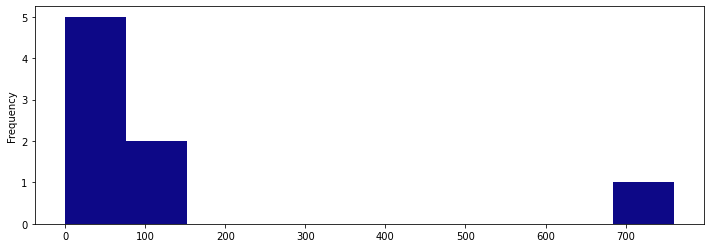

In [80]:
# summary stats on NANs
print(df_fda.isnull().sum().describe(),'\n')
# visualize with a histogram
df_fda.isnull().sum().describe().plot(kind='hist',colormap='plasma',figsize=(12,4));

By cutting out the two most extreme outliers, we've brought the range of NAN instances down significantly. Only one significant outlier remains: PCT_HSPA17, the percentage of the population that is of Hispanic origin. With a NAN count of 760, it's the only feature in the upper 61% of the distribution. However, dropping this feature may lead to an underrepresentation of this segment of the population in training. 

Fortunately, we also see the same demographical data reflected for 2010 by PCT_HISP10. As it turns out, the other demographics pertaining to race are all from 2010 as well, so dropping PCT_HSPA17 should not negatively impact the integrity of the data.


In [98]:
# drop column
df_fda = df_fda.drop(columns = nan_outliers)
# update column lists
col_fda col_feat = df_fda.columns[3:]

In [99]:
df_fda.shape #85

(3143, 85)

In [100]:
df_fda.isnull().sum().quantile(.99)

289.0

In [84]:
df_fda_full.loc[:,'PCT_HISP10'].isnull().sum()

0

In [95]:
# update column lists
col_feat = df_fda.columns[3:]
col_fda = df_fda.columns

In [ ]:
assert len(col_feat) == 83

In [81]:
col_feat

Index(['PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP15', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV15',
       'PCT_LACCESS_SNAP15', 'PCT_LACCESS_CHILD15',
       'PCH_LACCESS_SENIORS_10_15', 'PCT_LACCESS_SENIORS15',
       'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15', 'PCT_LACCESS_HISP15',
       'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_NHNA15', 'PCT_LACCESS_NHPI15',
       'PCT_LACCESS_MULTIR15', 'PCH_GROCPTH_11_16', 'GROCPTH16',
       'PCH_SUPERCPTH_11_16', 'SUPERCPTH16', 'CONVSPTH16', 'PCH_CONVS_11_16',
       'SNAPSPTH17', 'PCH_SNAPSPTH_12_17', 'WICSPTH16', 'PCH_WICSPTH_11_16',
       'PCH_FFRPTH_11_16', 'FFRPTH16', 'SNAP_PART_RATE16', 'SNAP_BBCE16',
       'SNAP_CAP16', 'SNAP_OAPP16', 'PC_SNAPBEN17', 'PCH_SNAP_12_17',
       'PCT_NSLP17', 'PCH_NSLP_12_17', 'PCT_FREE_LUNCH15',
       'PCT_REDUCED_LUNCH15', 'PCT_SBP17', 'PCH_SBP_12_17', 'PCT_SFSP17',
       'PCH_SFSP_12_17', 'REDEMP_WICS11', 'REDEMP_WICS16',
       'PCH_REDEMP_WICS_

In [ ]:
df_fda.info()

### Encoding
Considering how many unique values are reflected in the 'State' and 'County' (>3200) variables, one hot encoding them would bring the curse of diumensionality, whereas ordinally encoding them might assign a false significance to the location.  

Since the "FIPS" variable indicates location, we can avoid using either of these variables by excluding them from the analysis, using them instead for interpretability when using the FIPS code to identify target regions. 

### Transformation

#### Data Split



In [ ]:
pipes = {}
def add_pipe(pipe, name):
    '''
    Stores pipeline in dictionary
    '''
    if name in pipes.keys():
        print(f"A pipe called '{name}' already exists!")
        new_name = input("Enter another name:]")
        pipes[f"{new_name}"] = pipe
        print(f"'{new_name}' added to 'pipes'")
    else:
        pipes[f'{name}'] = pipe
        print(f"'{name}' added to 'pipes'")

In [ ]:
pipe_rfecv = Pipeline([('scaler', StandardScaler()),('rfecv',rfecv),('etr_2',etr_2)])
add_pipe(pipe_rfecv, 'rfecv')

### EDA

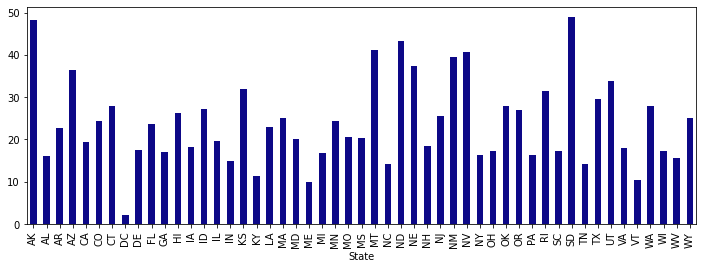

In [206]:
#mean population percentage with low access to grocery store by state
df_fda.groupby('State').PCT_LACCESS_POP15.mean().plot(kind='bar',colormap='plasma',figsize=(12,4))

In [ ]:
# ‘line’ : line plot (default)
# ‘bar’ : vertical bar plot
# ‘barh’ : horizontal bar plot
# ‘hist’ : histogram
# ‘box’ : boxplot
# ‘kde’ : Kernel Density Estimation plot
# ‘density’ : same as ‘kde’
# ‘area’ : area plot
# ‘pie’ : pie plot
# ‘scatter’ : scatter plot (DataFrame only)
# ‘hexbin’ : hexbin plot (DataFrame only)

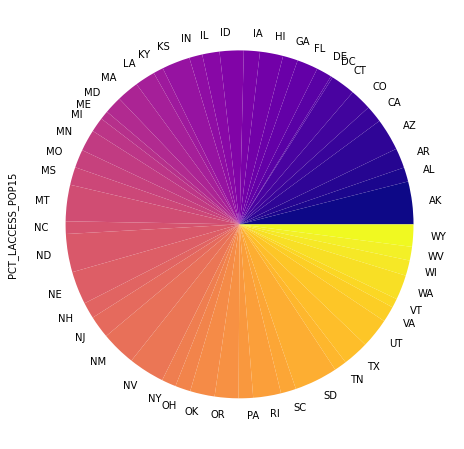

In [204]:
#mean population percentage with low access to grocery store by state
df_fda.groupby('State').PCT_LACCESS_POP15.mean().plot(kind='pie',colormap='plasma',figsize=(24,8))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


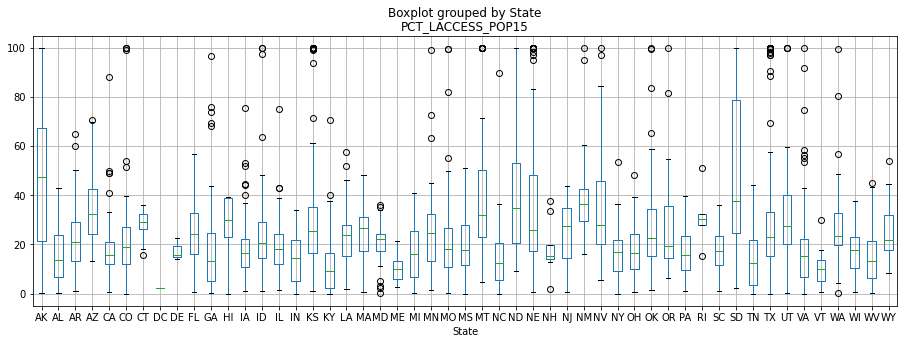

In [208]:
df_fda.boxplot(column='PCT_LACCESS_POP15',by='State',figsize=(15,5))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


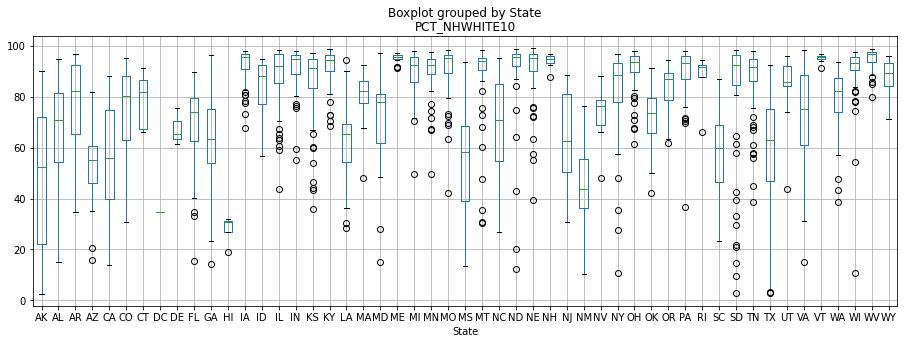

In [90]:
df_fda.boxplot(column='PCT_NHWHITE10',by='State',figsize=(15,5))